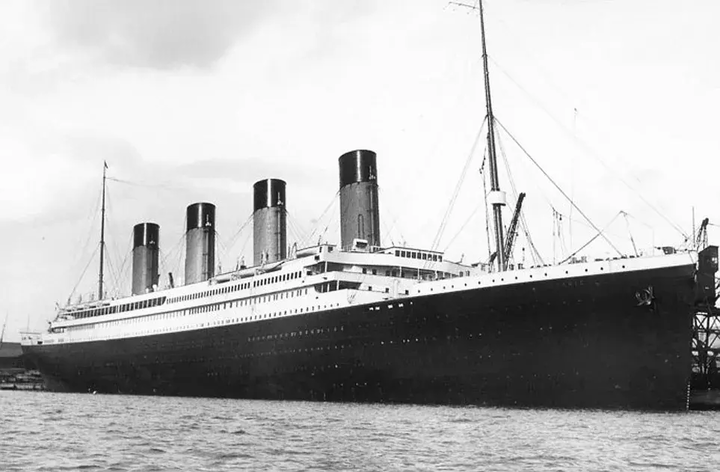

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

plt.rcParams["figure.figsize"] = (8,5)
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
df_sub=pd.read_csv("gender_submission.csv")

df = df_train.copy()

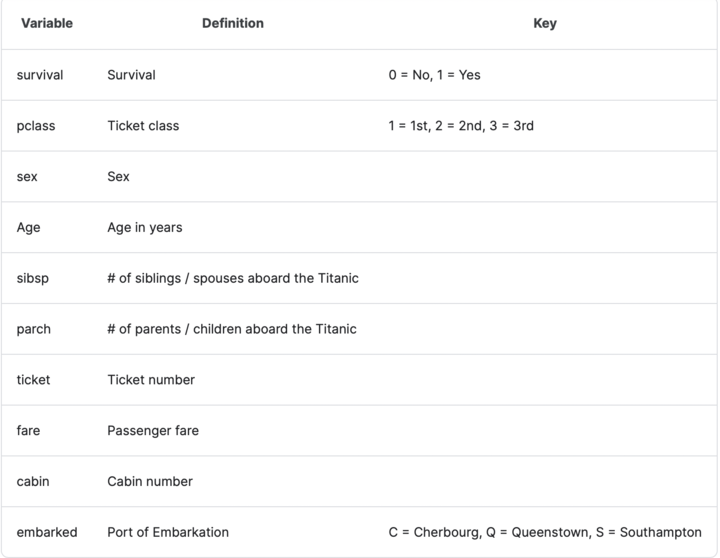


sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

# Exploratory Data Analysis and Visualization

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df.shape

(891, 12)

In [7]:
# General information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Checking the null values

df.isnull().sum()[df.isnull().sum() > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [9]:
# df_test

df_test.isnull().sum()[df_test.isnull().sum() > 0]

Age       86
Fare       1
Cabin    327
dtype: int64

In [10]:
# want to see percentage of null value

total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [11]:
# Statistical count of all numeric columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Above we can see that 38% out of the training-set survived the Titanic.

We can also see that the passenger age range from 0.4 to 80 years old.

We can already detect some features that contain missing values, like the ‘Age’ feature (714 out of 891 total).

There's an outlier for the 'Fare' price because of the differences between the 75th percentile, standard deviation, and the max value (512).

In [12]:
#Find the number duplicate record


print('df - Number of duplicate Record:', df.duplicated().sum())

print('df_test - Number of duplicate Record:', df_test.duplicated().sum())

df - Number of duplicate Record: 0
df_test - Number of duplicate Record: 0


In [13]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Data is clearly imbalanced, the count of people who survived is almost close to half the count of people who didn't survive

In [14]:
df.groupby("Sex")["Survived"].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

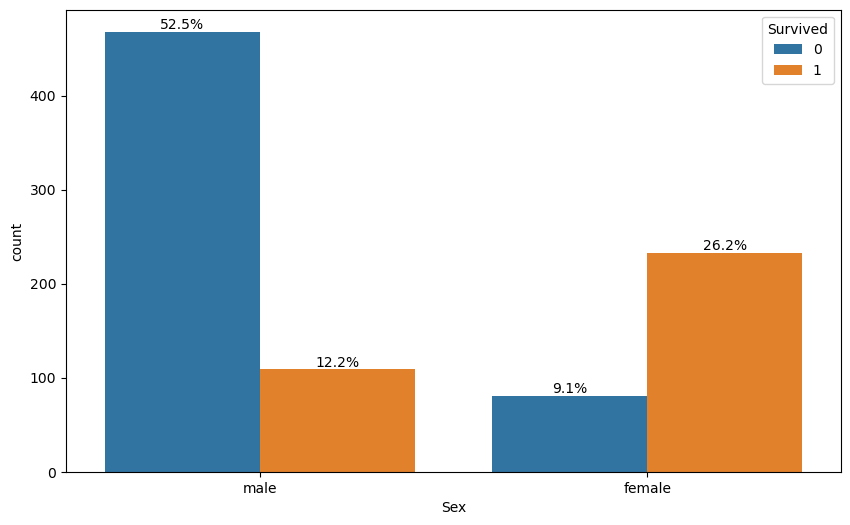

In [15]:
ax = sns.countplot(data=df, x="Sex", hue="Survived")

for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100 / df.shape[0]:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0,5),
                textcoords='offset points')

plt.show()

From the above stacked plots, it is clear more percentage of female passengers survived, even though more male passesngers were aboard

As previously mentioned, women are much more likely to survive than men. 74% of the women survived, while only 18% of men survived.

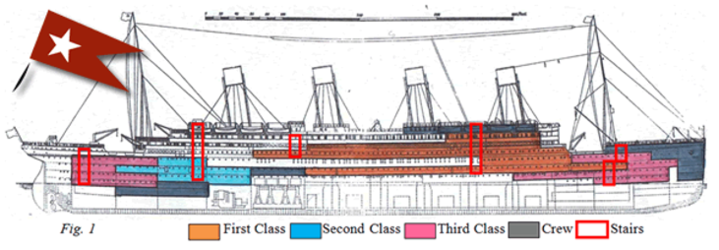

In [16]:
df.groupby(["Sex", "Pclass"])["Age"].mean()

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [17]:
df.groupby(["Sex", "Pclass"])[["Age", "Fare"]].mean()

Age        Fare
Sex    Pclass                       
female 1       34.611765  106.125798
       2       28.722973   21.970121
       3       21.750000   16.118810
male   1       41.281386   67.226127
       2       30.740707   19.741782
       3       26.507589   12.661633

Women are much more likely to survive than men, specially women in the first and second class. It also shows that men in the first class are almost 3-times more likely to survive than men in the third class.

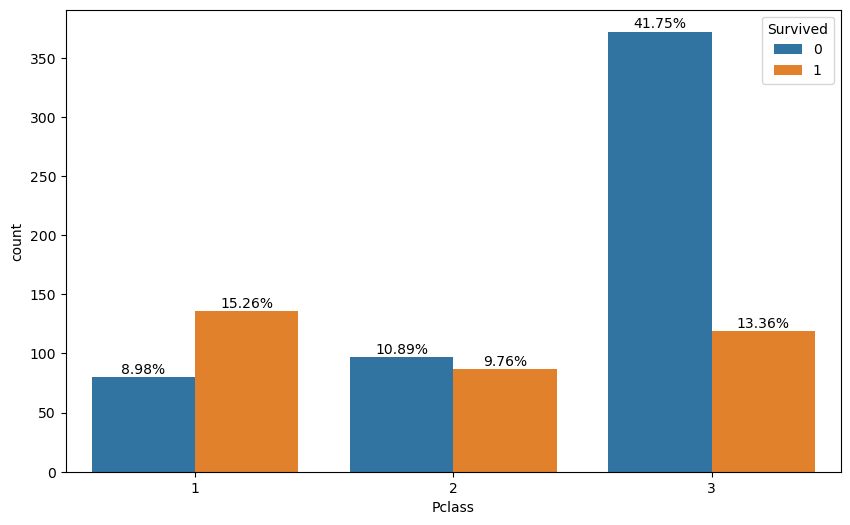

In [18]:
ax = sns.countplot(data=df, x="Pclass", hue="Survived")

# Calculate and annotate the percentages on top of the bars
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:1.2f}%'.format(height / total * 100),
            ha="center")

plt.show()

In [ ]:
sns.barplot(data=df, x="Pclass",y="Survived");

The graphs above clearly shows that economic status (Pclass) played an important role regarding the potential survival of the Titanic passengers. First class passengers had a much higher chance of survival than passengers in the 3rd class. We note that:

63% of the 1st class passengers survived the Titanic wreck

48% of the 2nd class passenger survived

Only 24% of the 3rd class passengers survived

In [ ]:
df[df["Age"]<18].groupby(["Sex", "Pclass"])["Age"].mean()

Children below 18 years of age have higher chances of surviving.

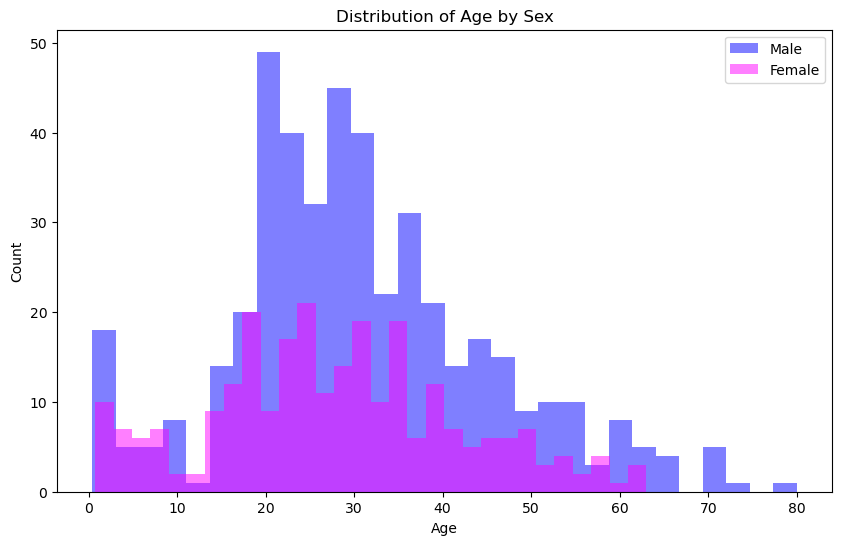

In [21]:
# Splitting the data based on Sex
male_age = df[df["Sex"] == "male"]["Age"].dropna()
female_age = df[df["Sex"] == "female"]["Age"].dropna()

# Plotting the histogram
plt.figure(figsize=(10, 6))

plt.hist(male_age, bins=30, alpha=0.5, label='Male', color='blue')
plt.hist(female_age, bins=30, alpha=0.5, label='Female', color='magenta')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age by Sex')
plt.legend()

plt.show()


We can see that men have a higher probability of survival when they are between 18 and 35 years old. For women, the survival chances are higher between 15 and 40 years old.

For men the probability of survival is very low between the ages of 5 and 18, and after 35, but that isn’t true for women. Another thing to note is that infants have a higher probability of survival.

## Correlation with target

In [22]:
df.corrwith(df["Survived"])

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
dtype: float64

In [23]:
# Filter only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Calculate correlation values with the 'Survived' column
correlation = numeric_cols.corrwith(df["Survived"]).drop("Survived", errors='ignore')

# Sort correlation values in descending order
sorted_corr = correlation.sort_values(ascending=False)

print(sorted_corr)


Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
dtype: float64


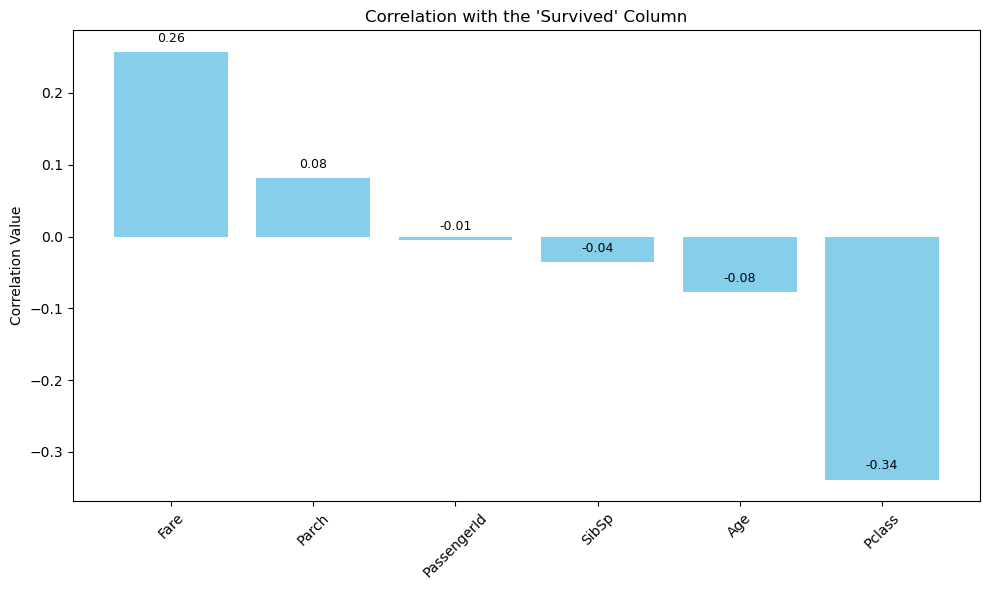

In [24]:
# Calculate correlation values
correlation = df.corrwith(df["Survived"]).drop("Survived")

# Sort correlation values in descending order
sorted_corr = correlation.sort_values(ascending=False)

# Visualize
plt.figure(figsize=(10,6))
bars = plt.bar(sorted_corr.index, sorted_corr.values, color="skyblue")

# Add the correlation value on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=9)

plt.title("Correlation with the 'Survived' Column")
plt.ylabel("Correlation Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Feature Generation and Removal


In [25]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [26]:
#get title

df["Title"] = df["Name"].apply( lambda x : x.split(",")[1].split(".")[0].strip())

In [27]:
df["Title"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [28]:
## merge similar titles  

map_dict = {"Ms":"Miss", "Mme":"Mrs", "Sir": "Mr", "Jonkheer":"Mr", "Lady":"Mrs", "Don":"Mr", "Dona":"Mrs","Mlle":"Miss", "Col":"Soldier", "Capt":"Soldier","Major":"Soldier"}
df["Title"] = df["Title"].apply(lambda x : map_dict[x] if x in map_dict else x)

In [29]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs


In [30]:
# We need to apply same changes on df_test too

df_test["Title"] = df_test["Name"].apply( lambda x : x.split(",")[1].split(".")[0].strip())

map_dict = {"Ms":"Miss", "Mme":"Mrs", "Sir": "Mr", "Jonkheer":"Mr", "Lady":"Mrs", "Don":"Mr", "Dona":"Mrs","Mlle":"Miss", "Col":"Soldier", "Capt":"Soldier","Major":"Soldier"}
df_test["Title"] = df_test["Title"].apply(lambda x : map_dict[x] if x in map_dict else x)

In [31]:
df_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs


In [32]:
#Family Size

df['Family_Size'] = 1 + df['SibSp'] + df['Parch']


In [33]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr,2


In [34]:
# for the test data

#Family Size

df_test['Family_Size'] = 1 + df_test['SibSp'] + df_test['Parch']


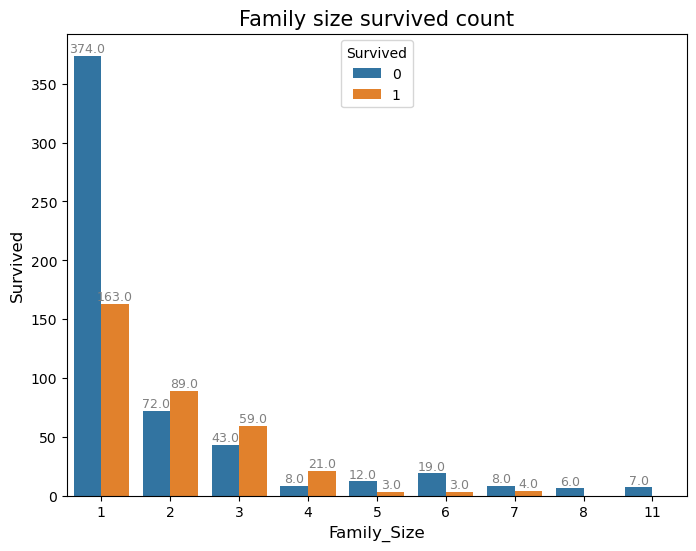

In [35]:
plt.figure(figsize=(8,6))

# Using default palette for bars
ax = sns.countplot(x=df.Family_Size, hue='Survived', data=df)

plt.xlabel('Family_Size', fontsize=12)
plt.ylabel('Survived', fontsize=12)
plt.title('Family size survived count', fontsize=15)

# Adding numbers on top of bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='gray', xytext=(0, 5),
                textcoords='offset points')

plt.show()

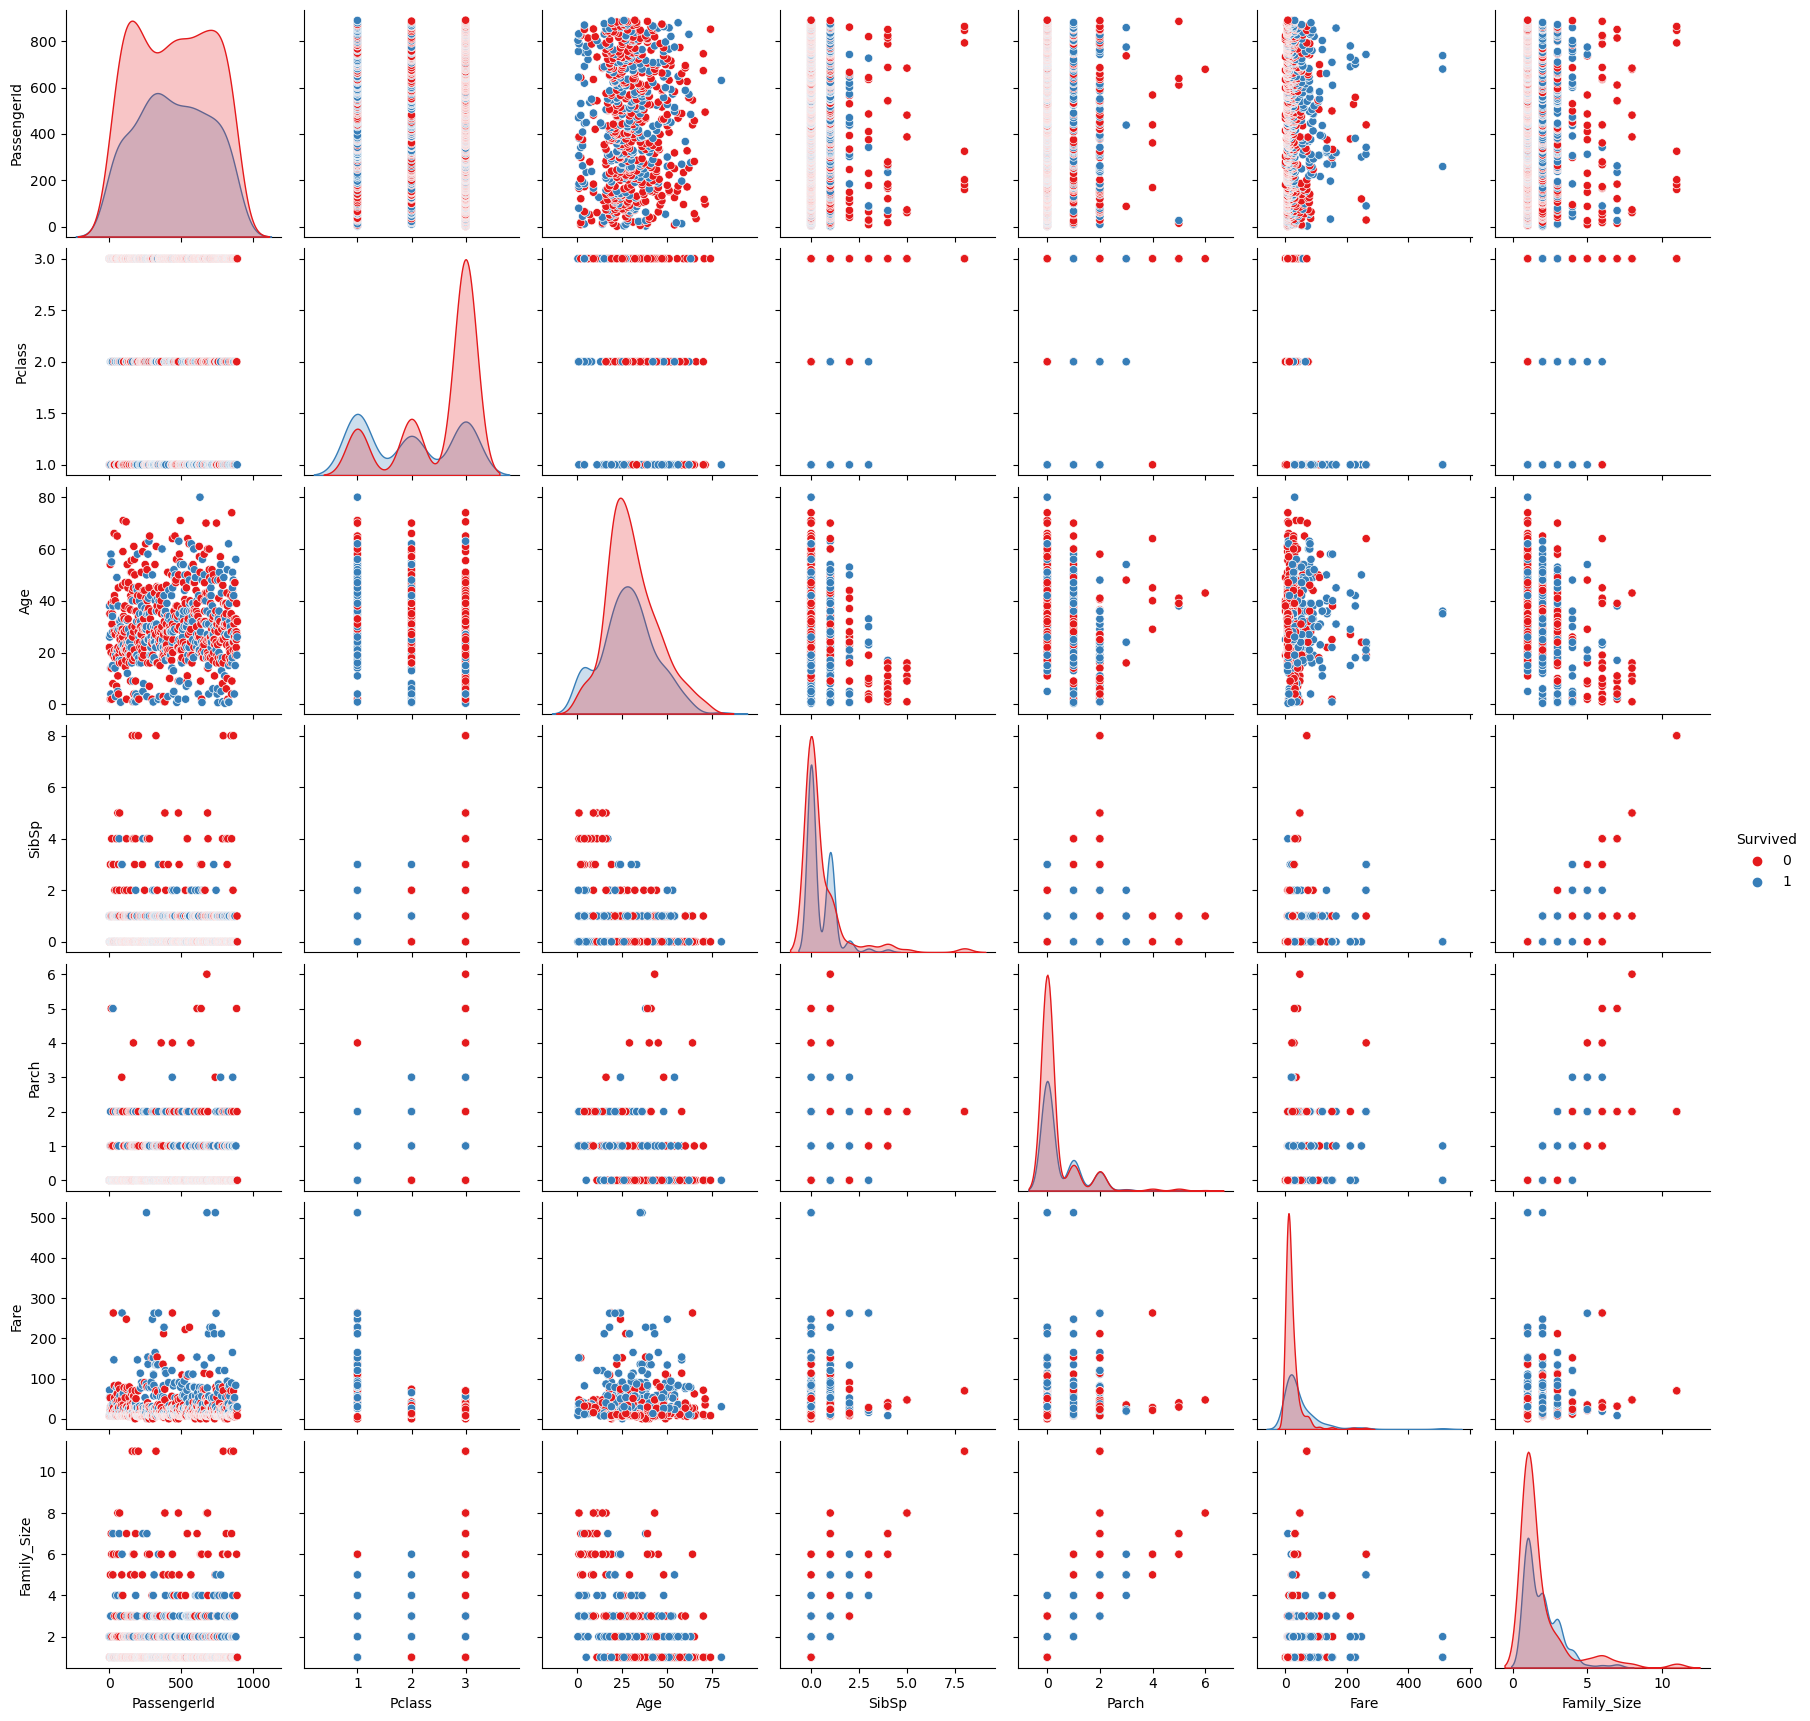

In [36]:
sns.pairplot(df, hue = "Survived", palette="Set1");

## Missing values

#### Embarked

In [37]:
df.isna().sum().sort_values(ascending=False)[:3]

Cabin       687
Age         177
Embarked      2
dtype: int64

In [38]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [39]:
# replace the null value of "Embarked" with most common letter 

df['Embarked'] = df['Embarked'].fillna('S')

#### Age

In [40]:
from sklearn.impute import KNNImputer

before_imputation = df[["Pclass", "SibSp", "Parch", "Fare", "Age"]]

imputer = KNNImputer()
df[["Pclass", "SibSp", "Parch", "Fare", "Age"]] = imputer.fit_transform(before_imputation)

In [41]:
df.isna().sum().sort_values(ascending=False)[:3]

Cabin          687
PassengerId      0
Survived         0
dtype: int64

In [42]:
before_imputation = df_test[["Pclass", "SibSp", "Parch", "Fare", "Age"]]

imputer = KNNImputer()
df_test[["Pclass", "SibSp", "Parch", "Fare", "Age"]] = imputer.fit_transform(before_imputation)

In [43]:
df['Child'] = df["Age"].apply(lambda i: 1 if i <= 17 and i > 6 else 0)
df['Toddler'] = df["Age"].apply(lambda i: 1 if i <= 6 else 0)
df['Elderly'] = df["Age"].apply(lambda i: 1 if i >= 60 else 0)

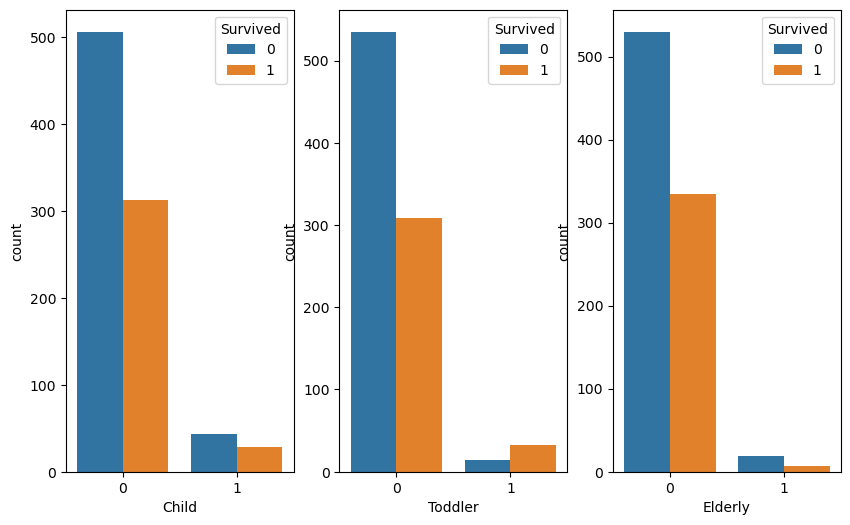

In [44]:
fig, ax = plt.subplots(1,3)
sns.countplot(data=df, x="Child", hue="Survived", ax=ax[0])
sns.countplot(data=df, x="Toddler", hue="Survived", ax=ax[1])
sns.countplot(data=df, x="Elderly", hue="Survived", ax=ax[2])
plt.show()

In [45]:
df_test['Child'] = df_test["Age"].apply(lambda i: 1 if i <= 17 and i > 6 else 0)
df_test['Toddler'] =df_test["Age"].apply(lambda i: 1 if i <= 6 else 0)
df_test['Elderly'] = df_test["Age"].apply(lambda i: 1 if i >= 60 else 0)

In [46]:
df.isnull().sum()[df.isnull().sum() > 0]

Cabin    687
dtype: int64

In [47]:
df_test.isnull().sum()[df_test.isnull().sum() > 0]

Cabin    327
dtype: int64

#### Cabin

In [48]:
## Since 'Cabin' has around 687 nan values which is more than 50 percent of the total data, we drop this feature


df['Cabin'] = df['Cabin'].fillna('nan')

df['CabinN'] = [1 if df['Cabin'].iloc[i] =='nan' else 0 for i in range(len(df))]

In [49]:
# make changes on test data

df_test['Cabin'] = df_test['Cabin'].fillna('nan')

df_test['CabinN'] = [1 if df['Cabin'].iloc[i] =='nan' else 0 for i in range(len(df_test))]

In [50]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [51]:
df_test.isnull().sum()[df_test.isnull().sum() > 0]

Series([], dtype: int64)

#### Fare

In [52]:
df.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

May need some changes

In [53]:
# fancy

df['Fancy'] = df['Fare'].apply(lambda i: 1 if i >= 100 else 0)

# standard

df['Standard_Fare'] = df['Fare'].apply(lambda i: 1 if i <= 10.0 else 0)

In [54]:
# for test data

df_test['Fancy'] =df_test['Fare'].apply(lambda i: 1 if i >= 100 else 0)


df_test['Standard_Fare'] = df_test['Fare'].apply(lambda i: 1 if i <= 10.0 else 0)

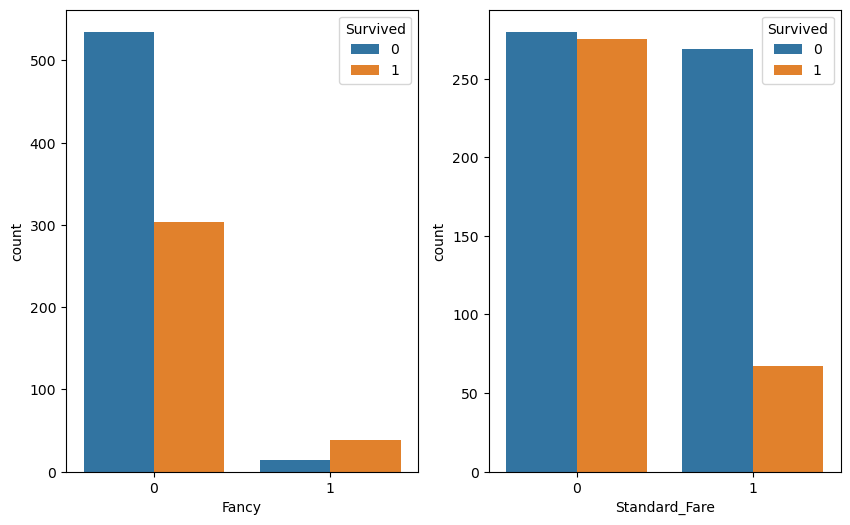

In [55]:
fig, ax = plt.subplots(1,2)
sns.countplot(data=df, x="Fancy", hue="Survived", ax=ax[0])
sns.countplot(data=df, x="Standard_Fare", hue="Survived", ax=ax[1])
plt.show()

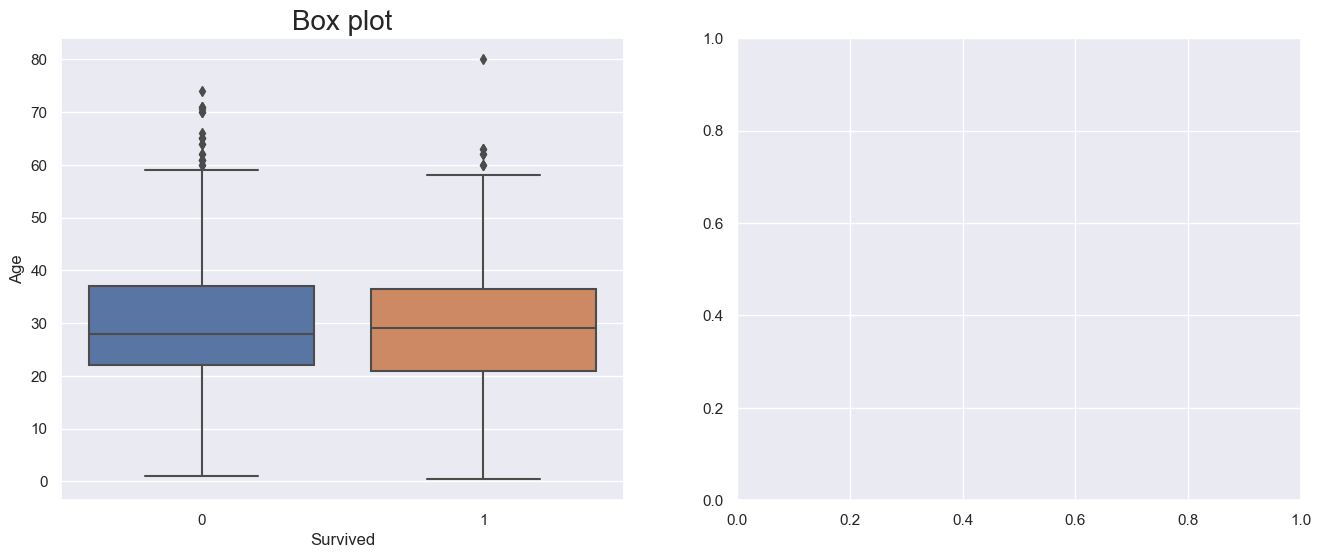

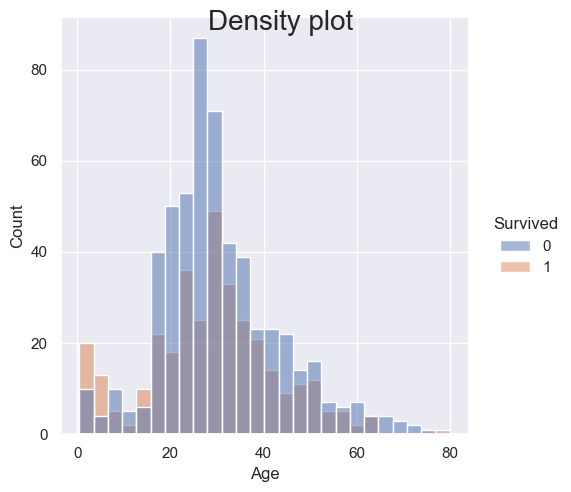

In [56]:
## Age of the people who survived

sns.set(rc = {'figure.figsize':(16,6)})
plt.plot(figure_size = (1,2))

#Boxplots
plt.subplot(1,2,1)
bp_ax = sns.boxplot(x = "Survived",y="Age", data = df)
bp_ax.set_title('Box plot', fontsize = 20)

#Density plots
plt.subplot(1,2,2)
dp_ax = sns.displot(x = 'Age', hue = 'Survived', data = df)
dp_ax.fig.suptitle('Density plot', fontsize=20)
plt.show()


* Distribution of people who didn't survive is slightly right skewed, or the mean of the people who did not survive > median of the distribution which is around ~27, i.e. mean age of the people who did not survive is higher than 27


* People of ages > ~67 are considered outliers in the disb of people who did not survive. owing to the fact people above the age of ~67 are very less and people of age ~60 above are outliers in the disb of people who did survive, i.e. very few people above 60 actually did survive

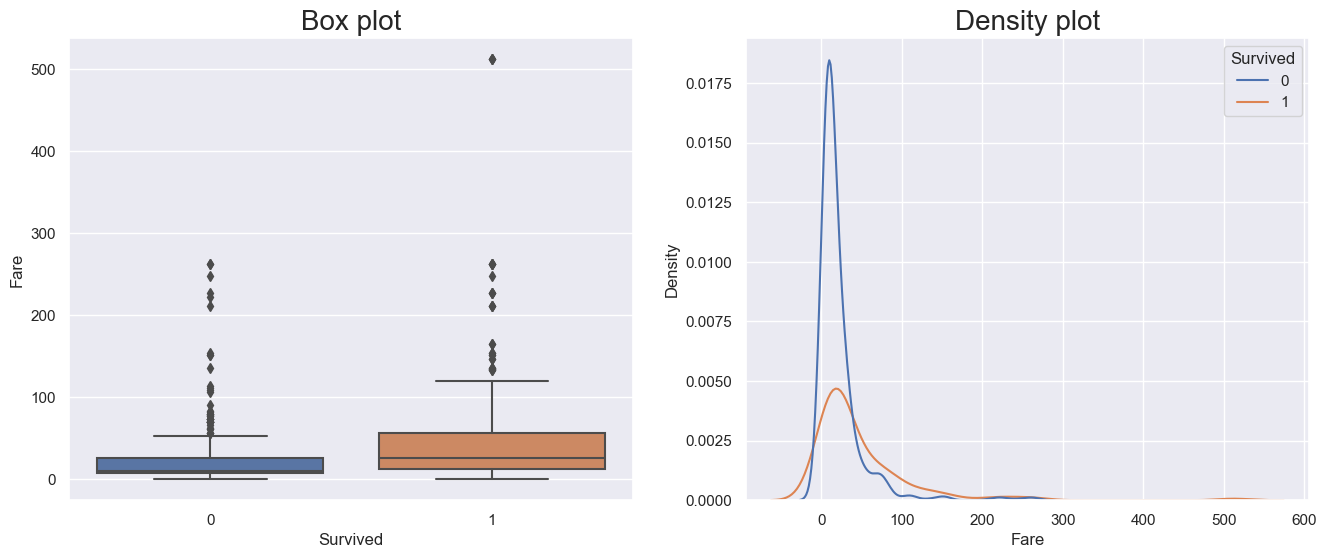

In [57]:
## Fares of the survivors

sns.set(rc = {'figure.figsize':(16,6)})
plt.plot(figure_size = (1,2))

#Boxplots
plt.subplot(1,2,1)
bp_ax = sns.boxplot(x = "Survived",y="Fare", data = df)
bp_ax.set_title('Box plot', fontsize = 20)

#Density plots
plt.subplot(1,2,2)
dp_ax = sns.kdeplot(x = 'Fare', hue = 'Survived', data = df)
dp_ax.set_title('Density plot', fontsize=20)
plt.show()

* Distribution of fares of survivors clearly has a higher median value, hence passengers who survived had higher average fares

* Lots of outliers in the distribution of both

* A huge spike in the pdf of the people who didn't survive, or the probability that the person who didn't survive had a fare of ~10 units of currency is very high

#### Survival Based Upon Embarked Label

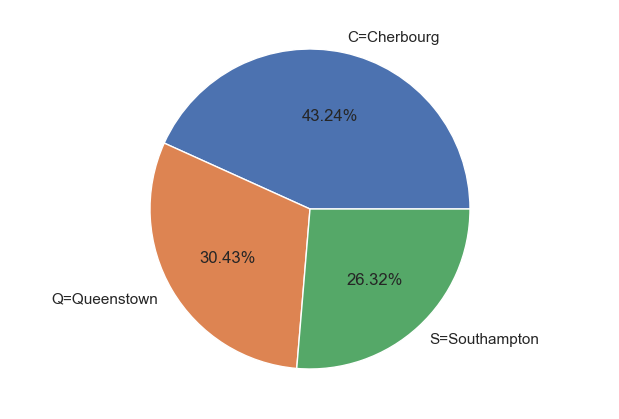

In [58]:
fig=plt.figure(figsize=(6,4))
ax=fig.add_axes([0,0,1,1])
ax.axis("equal")
l=["C=Cherbourg", "Q=Queenstown", "S=Southampton"]
s=[0.553571, 0.389610, 0.336957]
ax.pie(s, labels=l, autopct="%1.2f%%")
plt.show()

In [59]:
# Convert the string values to integers (Encoding)

for data in [df]:
    
    data["Sex"]=data["Sex"].map({"female":1, "male":0})
    
    data["Embarked"]=data["Embarked"].map({"S":0, "C":1, "Q":2})
    
    data["Title"]=data["Title"].map({"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":4, "Rev":5, "Soldier":6, "the Countess":7}).astype(int)

In [60]:
# test data

for data in [df_test]:
    
    data["Sex"]=data["Sex"].map({"female":1, "male":0})
    
    data["Embarked"]=data["Embarked"].map({"S":0, "C":1, "Q":2})
    
    data["Title"]=data["Title"].map({"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":4, "Rev":5, "Soldier":6, "the Countess":7}).astype(int)

In [61]:
df.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Child,Toddler,Elderly,CabinN,Fancy,Standard_Fare
195,196,1,1.0,"Lurette, Miss. Elise",1,58.0,0.0,0.0,PC 17569,146.5208,B80,1,1,1,0,0,0,0,1,0
128,129,1,3.0,"Peter, Miss. Anna",1,17.6,1.0,1.0,2668,22.3583,F E69,1,1,3,0,0,0,0,0,0


### Remove Unneccesary Features

In [62]:
df = df.drop(['Name','PassengerId', 'Ticket', 'Cabin', 'Fare', 'SibSp'], axis = 1)
df_test = df_test.drop(['Name','PassengerId', 'Ticket', 'Cabin', 'Fare', 'SibSp'], axis = 1)

In [63]:
df_test.head()

,Pclass,Sex,Age,Parch,Embarked,Title,Family_Size,Child,Toddler,Elderly,CabinN,Fancy,Standard_Fare
0,3.0,0,34.5,0.0,2,0,1,0,0,0,1,0,1
1,3.0,1,47.0,0.0,0,2,2,0,0,0,0,0,1
2,2.0,0,62.0,0.0,2,0,1,0,0,1,1,0,1
3,3.0,0,27.0,0.0,0,0,1,0,0,0,0,0,1
4,3.0,1,22.0,1.0,0,2,3,0,0,0,1,0,0


In [64]:
df.to_csv("Titanic_train_cleaned.csv", index=False)
df_test.to_csv("Titanic_test_cleaned.csv", index=False)

In [2]:
df = pd.read_csv("Titanic_train_cleaned.csv")
df.head()

,Survived,Pclass,Sex,Age,Parch,Embarked,Title,Family_Size,Child,Toddler,Elderly,CabinN,Fancy,Standard_Fare
0,0,3.0,0,22.0,0.0,0,0,2,0,0,0,1,0,1
1,1,1.0,1,38.0,0.0,1,2,2,0,0,0,0,0,0
2,1,3.0,1,26.0,0.0,0,1,1,0,0,0,1,0,1
3,1,1.0,1,35.0,0.0,0,2,2,0,0,0,0,0,0
4,0,3.0,0,35.0,0.0,0,0,1,0,0,0,1,0,1


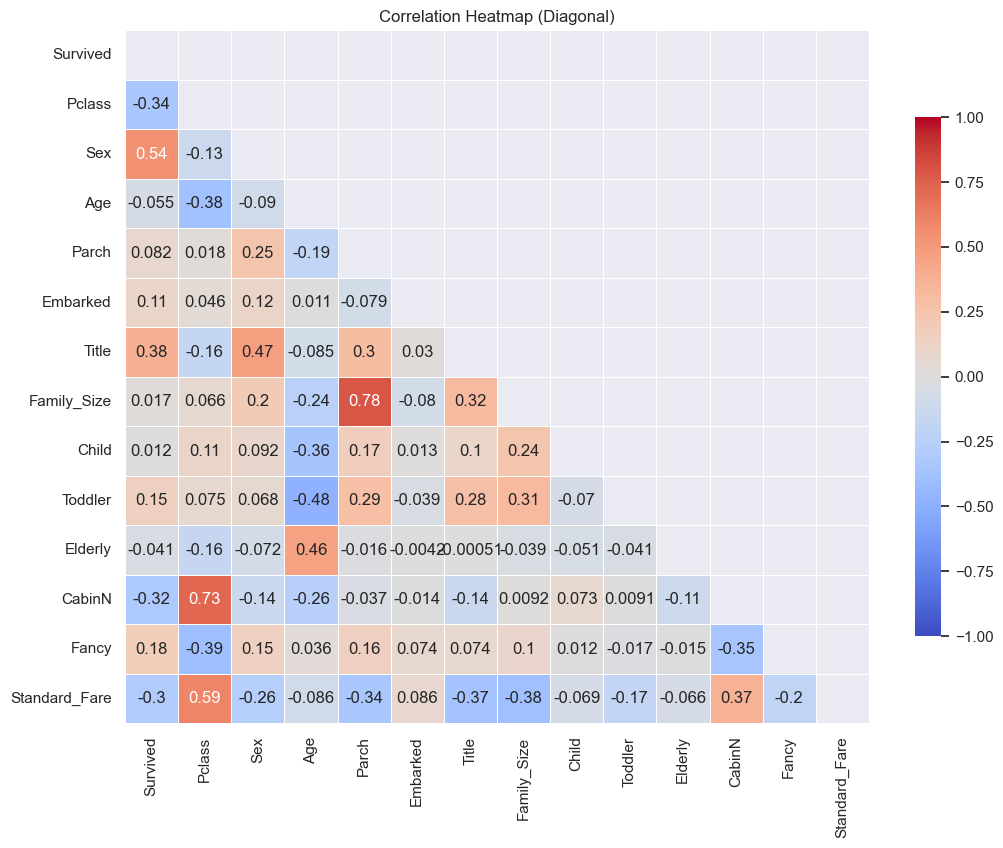

In [66]:
# Mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Setting up the figure and axis
plt.figure(figsize=(12, 9))

# Drawing the heatmap
sns.heatmap(df.corr(), annot=True, mask=mask, cmap="coolwarm", 
            vmax=1, vmin=-1, linewidths=.5, cbar_kws={"shrink": 0.75})

# Title
plt.title("Correlation Heatmap (Diagonal)")

plt.show()

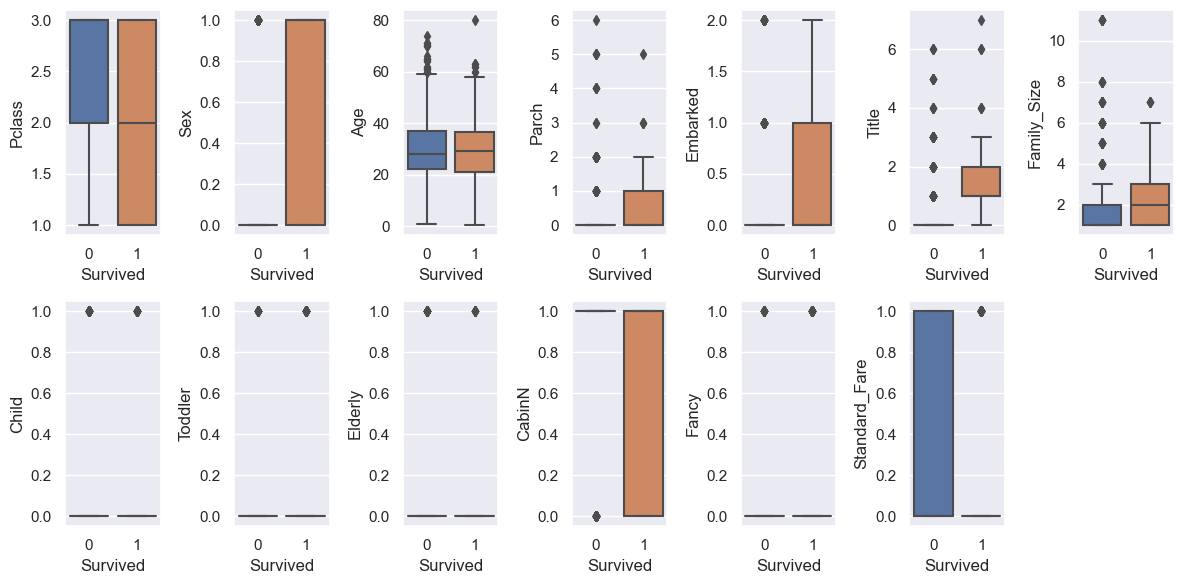

In [67]:
features = df.columns
index = 0
plt.figure(figsize=(12, 6))

for feature in features:
    if feature != "Survived":
        index += 1
        plt.subplot(2, 7, index)
        sns.boxplot(x='Survived', y=feature, data=df)
plt.tight_layout()
plt.show()

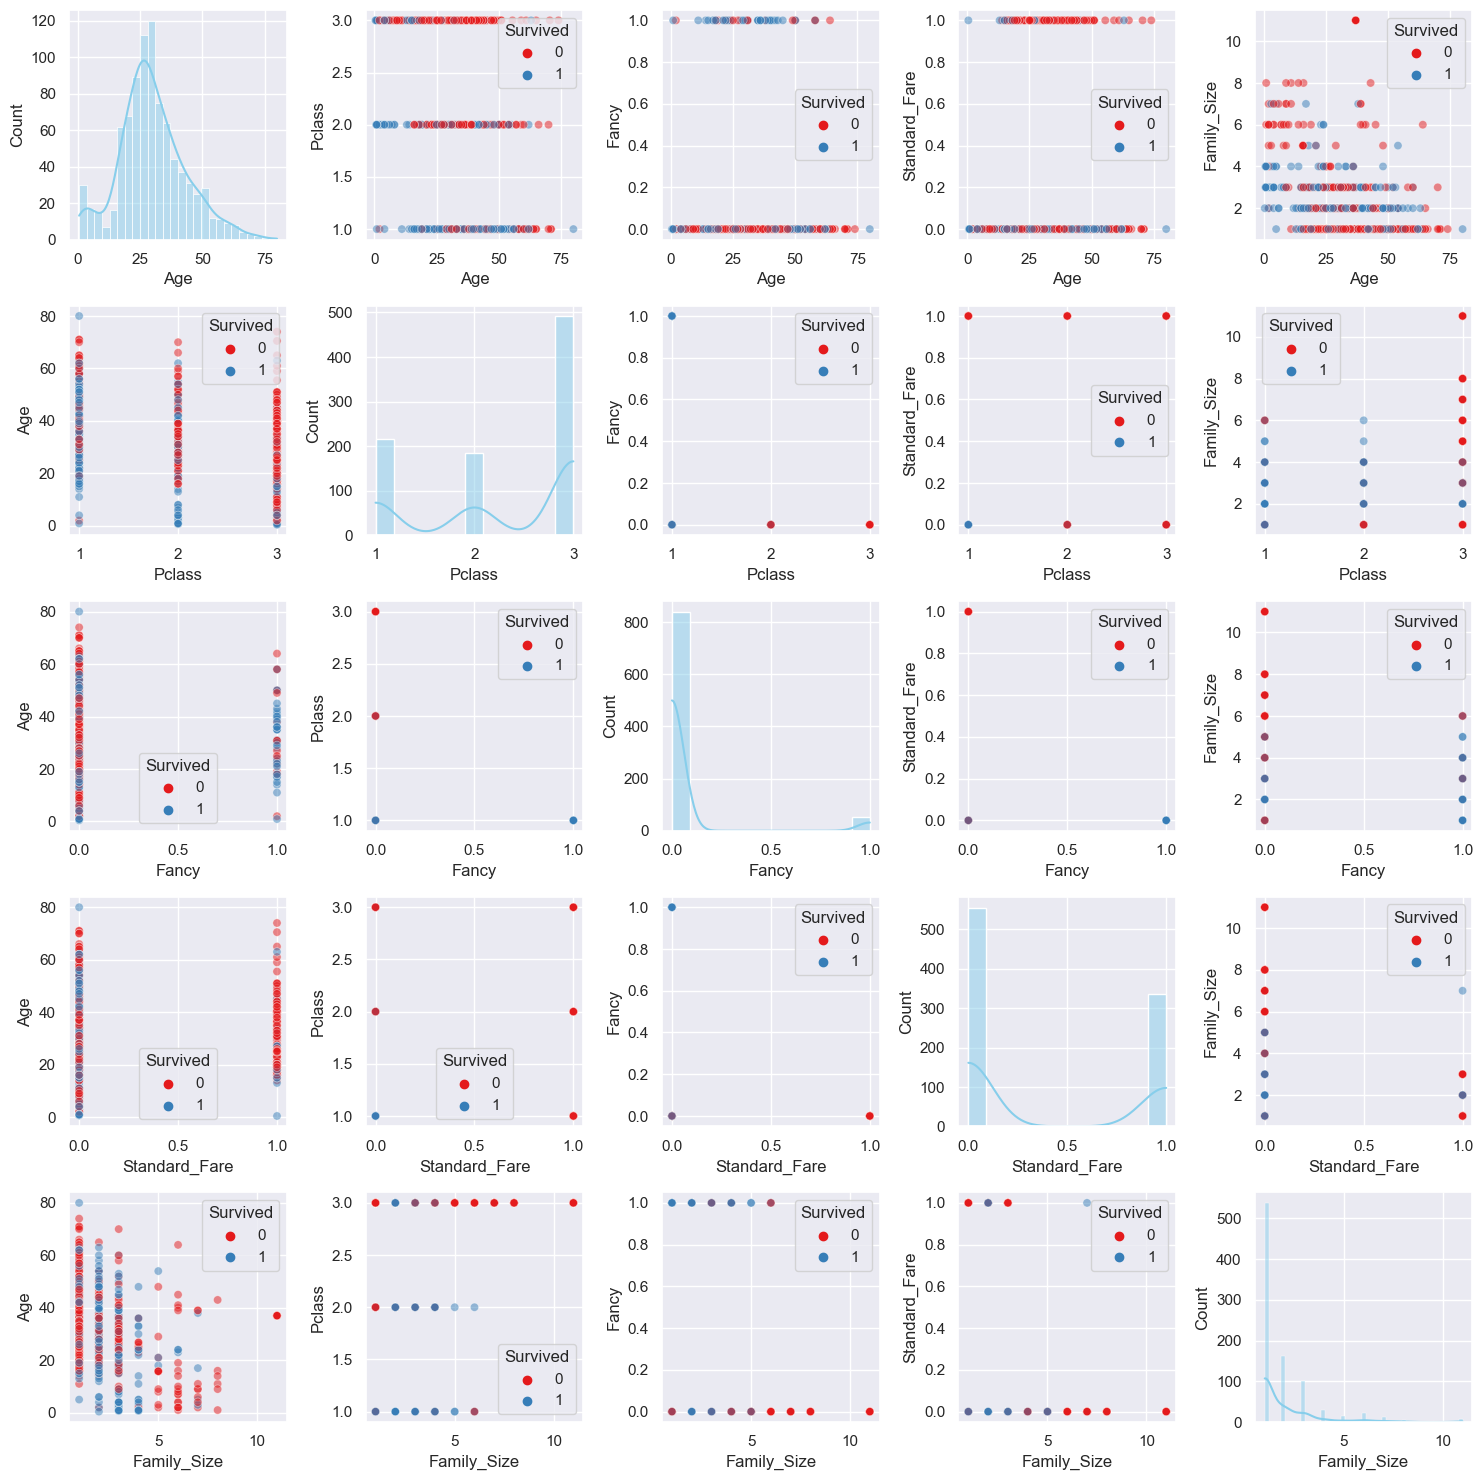

In [68]:
# List of numerical columns we're interested in
numerical_cols = ['Age', 'Pclass', 'Fancy', 'Standard_Fare', 'Family_Size']

# Create a pair of scatter plots for the numerical columns
plt.figure(figsize=(15,15))
plot_num = 1

for i in range(len(numerical_cols)):
    for j in range(len(numerical_cols)):
        plt.subplot(len(numerical_cols), len(numerical_cols), plot_num)
        if i != j:
            sns.scatterplot(data=df, x=numerical_cols[i], y=numerical_cols[j], hue="Survived", palette="Set1", alpha=0.5)
        else:
            # Diagonal: display a histogram
            sns.histplot(df[numerical_cols[i]], kde=True, color='skyblue')
        plot_num += 1

plt.tight_layout()
plt.show()


# AdaBoosting Classifier

## Train | Test Split

In [3]:
from sklearn.model_selection import train_test_split

X=df.drop(columns="Survived")
y=df["Survived"]

In [4]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

## SMOTE

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Modelling and Model Performance

In [7]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [8]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline  # imblearn'ün kendi pipeline'ını kullanıyoruz

over = SMOTE()

operations = [('o', over),
              ("Ada", AdaBoostClassifier(random_state=101))]

ada_pipe = Pipeline(steps=operations)

ada_pipe.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE()), ('Ada', AdaBoostClassifier(random_state=101))])

In [9]:
eval_metric(ada_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[84 15]
 [14 66]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85        99
           1       0.81      0.82      0.82        80

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179


Train_Set
[[373  77]
 [ 44 218]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       450
           1       0.74      0.83      0.78       262

    accuracy                           0.83       712
   macro avg       0.82      0.83      0.82       712
weighted avg       0.84      0.83      0.83       712



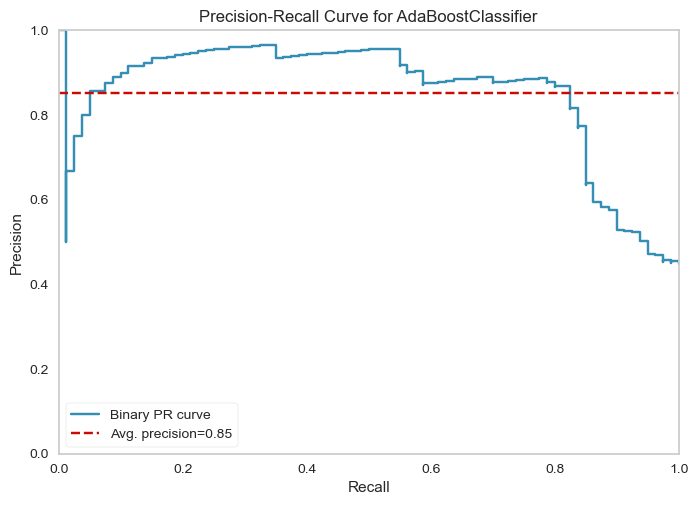

In [10]:
from yellowbrick.classifier import PrecisionRecallCurve

model = ada_pipe
viz = PrecisionRecallCurve(
    model,
    per_class=True, #buraya bunu vermezsek binary gibi çalışır.
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [11]:
error_rates = []

for n in range(1,100):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - f1_score(y_test,preds)
    
    error_rates.append(err)

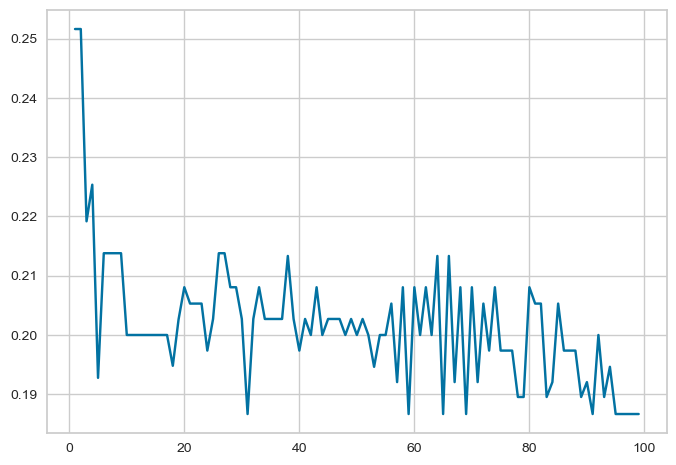

In [12]:
plt.plot(range(1,100), error_rates);

## Gridsearch

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline  # imblearn'ün kendi pipeline'ını kullanıyoruz

over = SMOTE()

# Pipeline oluşturma
steps = [('o', over),
         ('adaboost', AdaBoostClassifier(random_state=101))
]
pipeline = Pipeline(steps=steps)

# Parametre gridini belirleme
param_grid = {
    'adaboost__n_estimators': [50, 64, 100, 128, 200],
    'adaboost__learning_rate': [0.01, 0.1, 0.2, 0.5]
}

# GridSearchCV ile modeli ayarlama
ada_grid_pipe = GridSearchCV(pipeline, 
                             param_grid,
                             scoring='f1')
ada_grid_pipe.fit(X_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('o', SMOTE()),
                                       ('adaboost',
                                        AdaBoostClassifier(random_state=101))]),
             param_grid={'adaboost__learning_rate': [0.01, 0.1, 0.2, 0.5],
                         'adaboost__n_estimators': [50, 64, 100, 128, 200]},
             scoring='f1')

In [14]:
ada_grid_pipe.best_params_

{'adaboost__learning_rate': 0.1, 'adaboost__n_estimators': 64}

In [15]:
ada_grid_pipe.best_score_

0.7602943120968201

In [16]:
y_pred = ada_grid_pipe.predict(X_test)

ada_f1 = f1_score(y_test, y_pred)
ada_recall = recall_score(y_test, y_pred)
ada_auc = roc_auc_score(y_test, y_pred)
eval_metric(ada_grid_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[81 18]
 [14 66]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        99
           1       0.79      0.82      0.80        80

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179


Train_Set
[[362  88]
 [ 41 221]]
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       450
           1       0.72      0.84      0.77       262

    accuracy                           0.82       712
   macro avg       0.81      0.82      0.81       712
weighted avg       0.83      0.82      0.82       712



In [17]:
print(f1_score(y_test, y_pred))

0.8048780487804876


In [18]:
print(recall_score(y_test, y_pred))

0.825


In [21]:
y_pred = ada_grid_pipe.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[81, 18],
       [14, 66]], dtype=int64)

## Feature_importances

In [22]:
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
model.feature_importances_

feats = pd.DataFrame(index=X.columns, data= model.feature_importances_, columns=['ada_importance'])
ada_imp_feats = feats.sort_values("ada_importance")
ada_imp_feats

,ada_importance
Parch,0.00
Child,0.00
Toddler,0.00
Elderly,0.00
Fancy,0.00
Standard_Fare,0.00
Embarked,0.02
Sex,0.06
CabinN,0.07
Family_Size,0.12


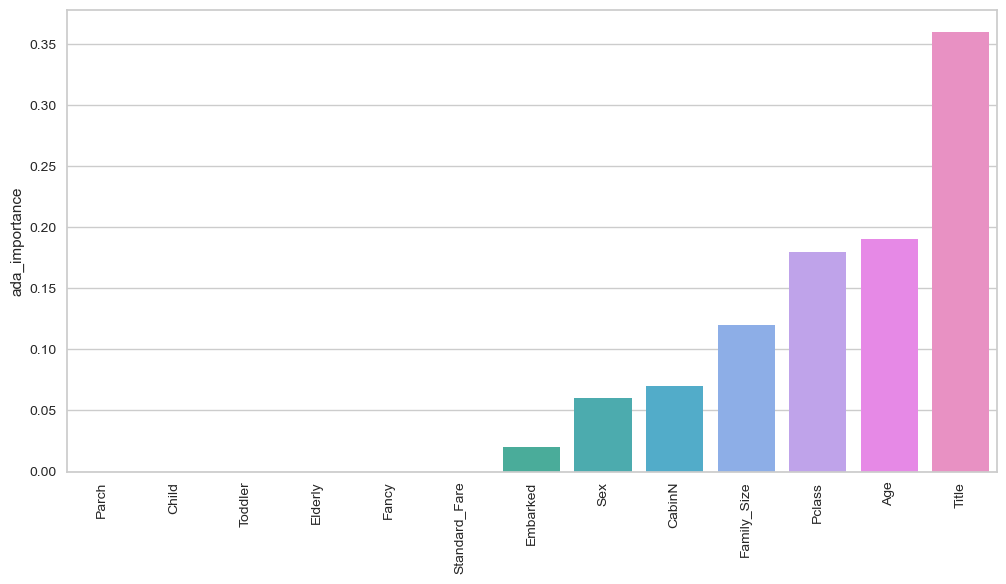

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(data=ada_imp_feats ,x=ada_imp_feats.index, y='ada_importance')

plt.xticks(rotation=90);

## Evaluating ROC Curves and AUC

In [24]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score

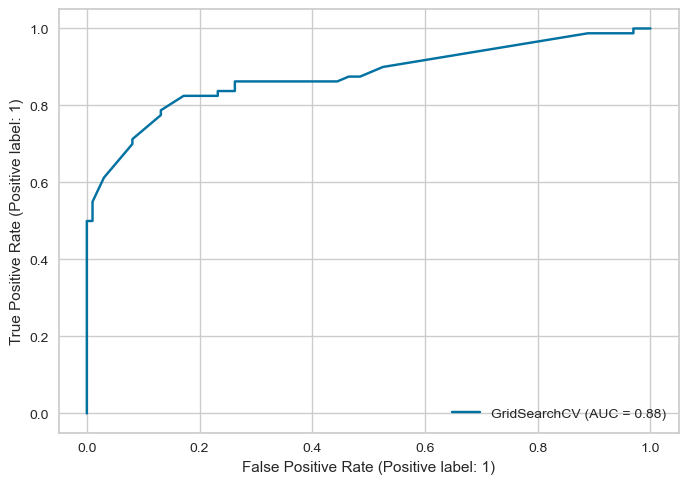

In [25]:
plot_roc_curve(ada_grid_pipe, X_test, y_test);

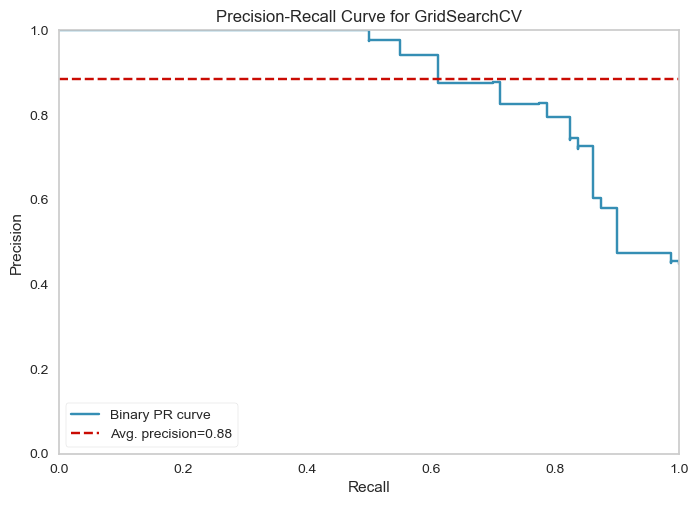

In [26]:
from yellowbrick.classifier import PrecisionRecallCurve

model = ada_grid_pipe
viz = PrecisionRecallCurve(
    model,
    per_class=True, #buraya bunu vermezsek binary gibi çalışır.
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

# GradientBoosting Classifier

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline  # imblearn'ün kendi pipeline'ını kullanıyoruz

over = SMOTE()

operations = [('o', over),
              ("Grad", GradientBoostingClassifier(random_state=101))]

grad_pipe = Pipeline(steps=operations)

grad_pipe.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE()),
                ('Grad', GradientBoostingClassifier(random_state=101))])

In [28]:
eval_metric(grad_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[85 14]
 [16 64]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        99
           1       0.82      0.80      0.81        80

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179


Train_Set
[[406  44]
 [ 38 224]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       450
           1       0.84      0.85      0.85       262

    accuracy                           0.88       712
   macro avg       0.88      0.88      0.88       712
weighted avg       0.89      0.88      0.89       712



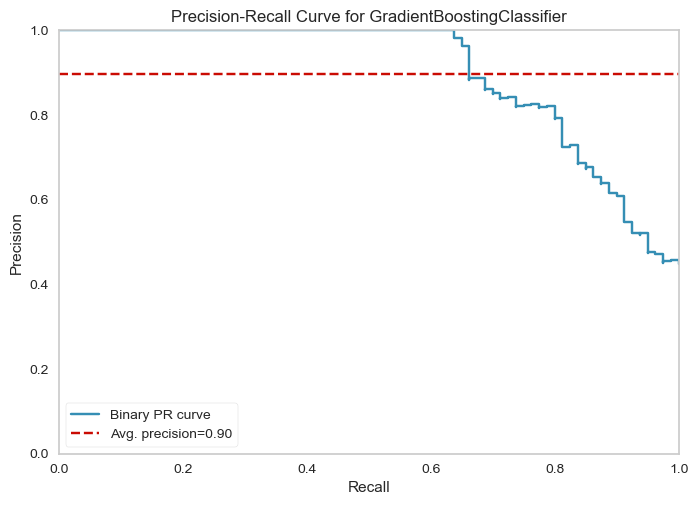

In [37]:
from yellowbrick.classifier import PrecisionRecallCurve

model = grad_pipe
viz = PrecisionRecallCurve(
    model,
    per_class=True, #buraya bunu vermezsek binary gibi çalışır.
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

## GridSearch

In [33]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline  # imblearn'ün kendi pipeline'ını kullanıyoruz

over = SMOTE()

# Pipeline oluşturma
pipeline = Pipeline([('o', over),
                     ('Grad', GradientBoostingClassifier(random_state=101))
])

# Parametre gridini belirleme
param_grid = {
    'Grad__n_estimators': [50, 64, 100, 128],
    'Grad__learning_rate': [0.01, 0.1, 0.2, 0.5],
    'Grad__max_features' : [None, 2, 3, 4]}

# GridSearchCV ile modeli ayarlama
grad_grid_pipe = GridSearchCV(pipeline, 
                              param_grid,
                              scoring='f1')


grad_grid_pipe.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('o', SMOTE()),
                                       ('Grad',
                                        GradientBoostingClassifier(random_state=101))]),
             param_grid={'Grad__learning_rate': [0.01, 0.1, 0.2, 0.5],
                         'Grad__max_features': [None, 2, 3, 4],
                         'Grad__n_estimators': [50, 64, 100, 128]},
             scoring='f1')

In [34]:
grad_grid_pipe.best_params_

{'Grad__learning_rate': 0.1,
 'Grad__max_features': None,
 'Grad__n_estimators': 64}

In [38]:
grad_grid_pipe.best_score_

0.7720872016706128

In [39]:
y_pred = grad_grid_pipe.predict(X_test)

gb_f1 = f1_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred)

eval_metric(grad_grid_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[85 14]
 [17 63]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        99
           1       0.82      0.79      0.80        80

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179


Train_Set
[[397  53]
 [ 41 221]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       450
           1       0.81      0.84      0.82       262

    accuracy                           0.87       712
   macro avg       0.86      0.86      0.86       712
weighted avg       0.87      0.87      0.87       712



## Feature importances

In [40]:
model = GradientBoostingClassifier(max_features= 3, n_estimators = 100, subsample = 0.5, random_state=42)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['grad_importance'])
grad_imp_feats = feats.sort_values("grad_importance")
grad_imp_feats

,grad_importance
Child,0.005536
Elderly,0.007301
Fancy,0.012925
Toddler,0.020201
Standard_Fare,0.032787
Embarked,0.035618
Parch,0.036225
CabinN,0.066022
Family_Size,0.097595
Pclass,0.109042


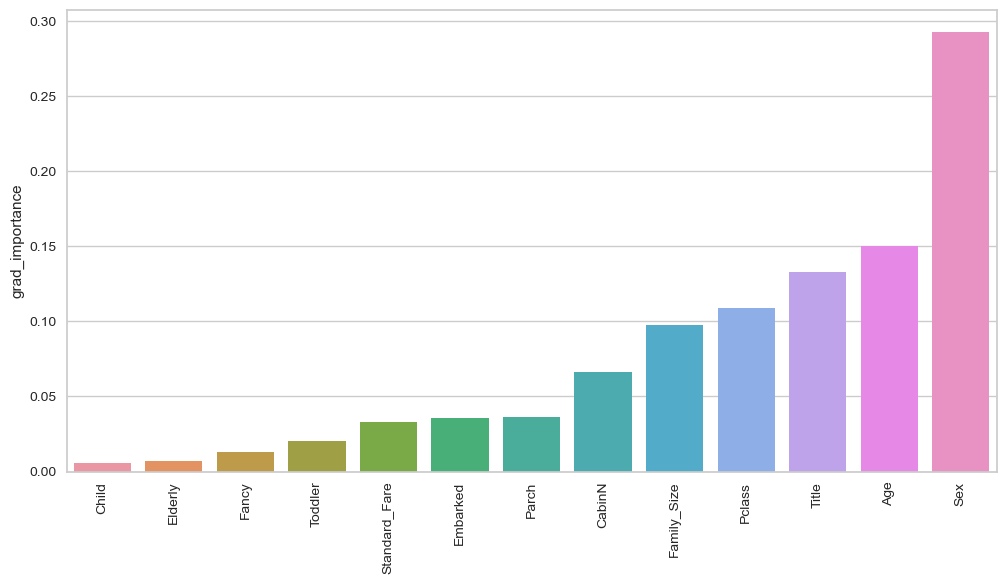

In [41]:
plt.figure(figsize=(12,6))
sns.barplot(data=grad_imp_feats, x=grad_imp_feats.index, y='grad_importance')

plt.xticks(rotation=90);

## valuating ROC Curves and AUC

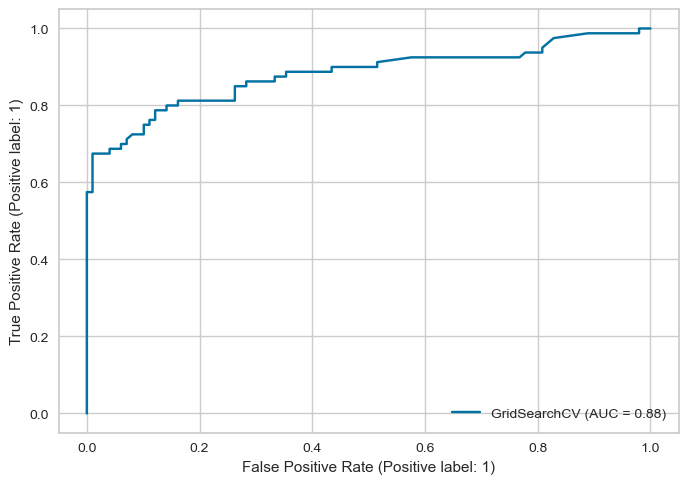

In [42]:
plot_roc_curve(grad_grid_pipe, X_test, y_test);

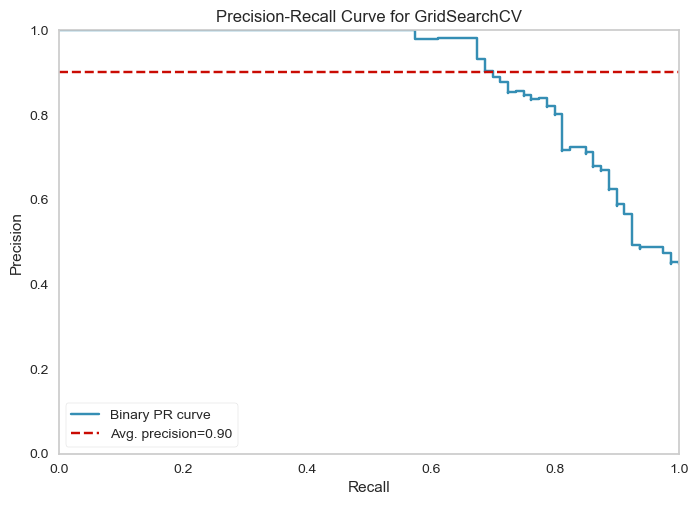

In [43]:
from yellowbrick.classifier import PrecisionRecallCurve

model = grad_grid_pipe
viz = PrecisionRecallCurve(
    model,
    per_class=True, #buraya bunu vermezsek binary gibi çalışır.
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

# XGBoosting Classifier

In [44]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline  # imblearn'ün kendi pipeline'ını kullanıyoruz

over = SMOTE()

operations = [('o', over),
              ("xgb", XGBClassifier(random_state=101))]

xgb_pipe = Pipeline(steps=operations)

xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=101, ...))])

In [45]:
eval_metric(xgb_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[79 20]
 [19 61]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        99
           1       0.75      0.76      0.76        80

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179


Train_Set
[[440  10]
 [ 22 240]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       450
           1       0.96      0.92      0.94       262

    accuracy                           0.96       712
   macro avg       0.96      0.95      0.95       712
weighted avg       0.96      0.96      0.95       712



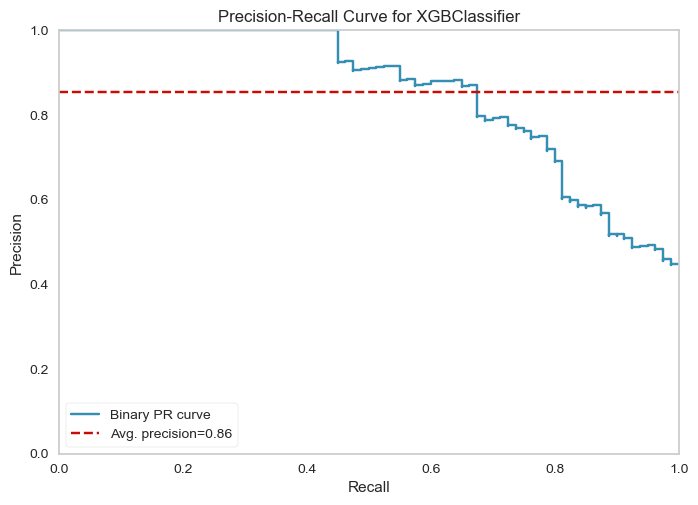

In [46]:
from yellowbrick.classifier import PrecisionRecallCurve

model = xgb_pipe
viz = PrecisionRecallCurve(
    model,
    per_class=True, #buraya bunu vermezsek binary gibi çalışır.
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

## Gridsearch

In [47]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline  # imblearn'ün kendi pipeline'ını kullanıyoruz

over = SMOTE()

# Pipeline oluşturma
pipeline = Pipeline([('o', over),
                     ('xgb', XGBClassifier(random_state=101))
])

# Parametre gridini belirleme
param_grid = {"xgb__n_estimators":[50, 64, 100, 128],
              'xgb__max_depth':[3,4,5], 
              "xgb__learning_rate": [0.1, 0.2],
             "xgb__subsample":[0.5, 0.8],
              "xgb__colsample_bytree":[0.5, 0.7]}

# GridSearchCV ile modeli ayarlama
xgb_grid_pipe = GridSearchCV(pipeline, 
                             param_grid,
                             scoring='f1')


xgb_grid_pipe.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('o', SMOTE()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_cons...
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=101, ...))]),
             param_grid={'xgb__colsample_bytree': [0.5, 0.7],
                         'xgb__learning_rate': [0.1, 0.2],
                         'xgb__max_depth': [3, 4, 5],
                         'xgb__n_estimators': [50, 64, 100, 128],
                         'xgb__subsample': [0.5, 0.8]},
             scoring='f1')

In [48]:
xgb_grid_pipe.best_params_

{'xgb__colsample_bytree': 0.7,
 'xgb__learning_rate': 0.1,
 'xgb__max_depth': 3,
 'xgb__n_estimators': 100,
 'xgb__subsample': 0.8}

In [49]:
xgb_grid_pipe.best_score_

0.7602871675104685

In [50]:
y_pred = xgb_grid_pipe.predict(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

eval_metric(xgb_grid_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[88 11]
 [19 61]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        99
           1       0.85      0.76      0.80        80

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179


Train_Set
[[403  47]
 [ 46 216]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       450
           1       0.82      0.82      0.82       262

    accuracy                           0.87       712
   macro avg       0.86      0.86      0.86       712
weighted avg       0.87      0.87      0.87       712



## Feature importances

In [51]:
model = XGBClassifier(random_state=101, 
                      colsample_bytree = 0.7, 
                      subsample= 0.5,
                     learning_rate=0.1,
                      max_depth= 3)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance")
xgb_imp_feats

,xgb_importance
Elderly,0.013186
Fancy,0.018642
Parch,0.021687
Child,0.034554
Age,0.049064
Standard_Fare,0.049471
Embarked,0.050742
Family_Size,0.060992
CabinN,0.077322
Toddler,0.080108


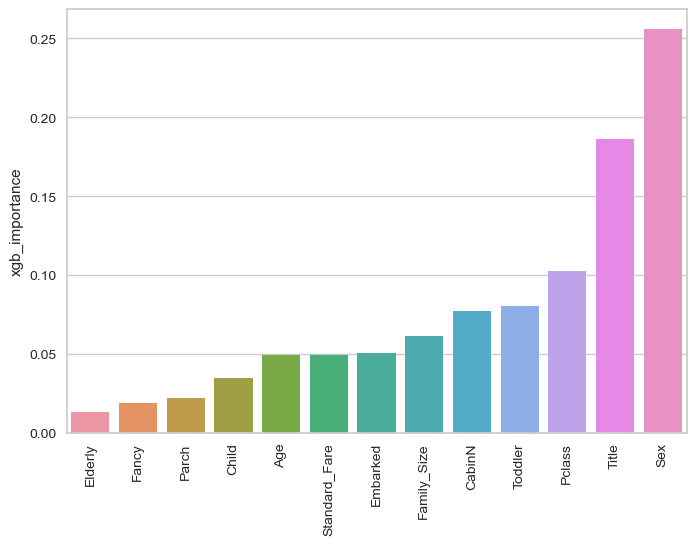

In [52]:
sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index,y='xgb_importance')

plt.xticks(rotation=90);

## Feature importance comparison

In [53]:
pd.concat([ada_imp_feats, grad_imp_feats, xgb_imp_feats], axis=1)

,ada_importance,grad_importance,xgb_importance
Parch,0.00,0.036225,0.021687
Child,0.00,0.005536,0.034554
Toddler,0.00,0.020201,0.080108
Elderly,0.00,0.007301,0.013186
Fancy,0.00,0.012925,0.018642
Standard_Fare,0.00,0.032787,0.049471
Embarked,0.02,0.035618,0.050742
Sex,0.06,0.293199,0.255872
CabinN,0.07,0.066022,0.077322
Family_Size,0.12,0.097595,0.060992


## Evaluating ROC Curves and AUC

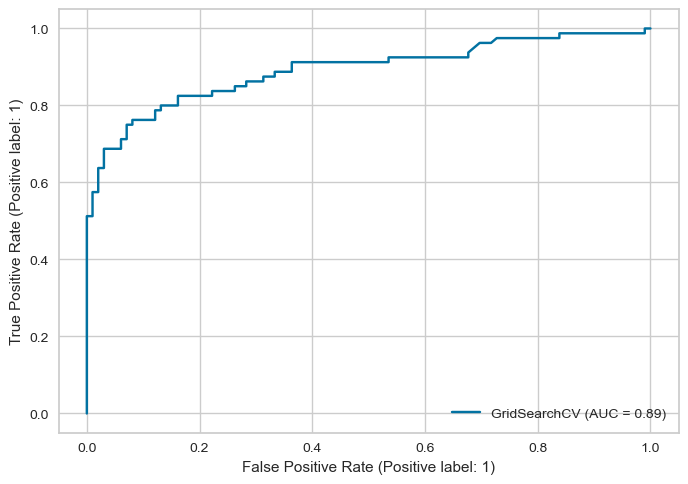

In [54]:
plot_roc_curve(xgb_grid_pipe, X_test, y_test);

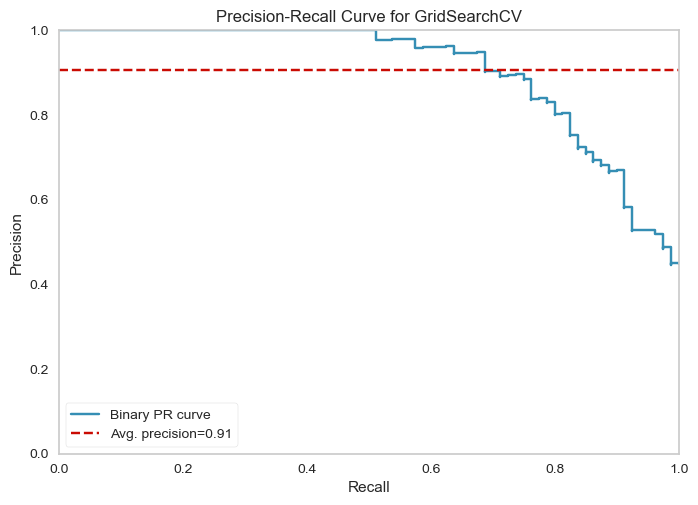

In [55]:
from yellowbrick.classifier import PrecisionRecallCurve

model = xgb_grid_pipe
viz = PrecisionRecallCurve(
    model,
    per_class=True, #buraya bunu vermezsek binary gibi çalışır.
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

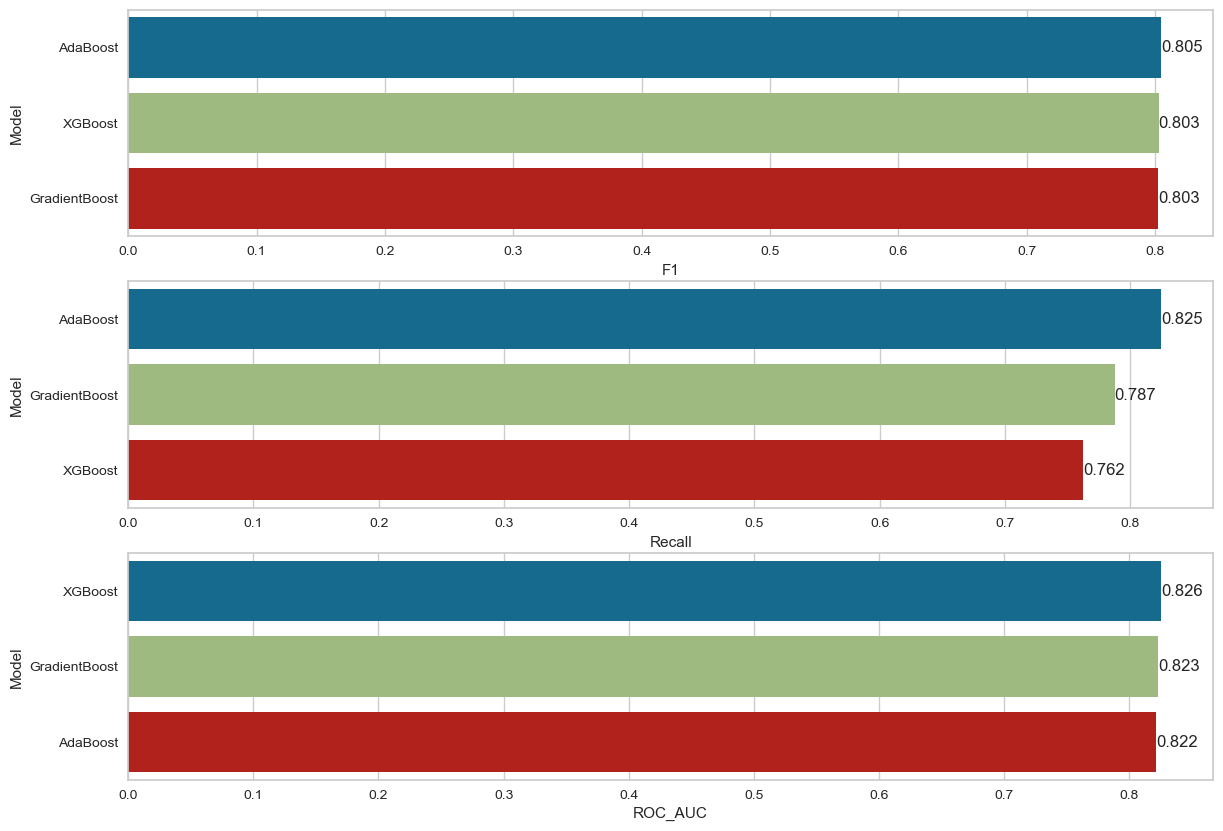

In [56]:
compare = pd.DataFrame({"Model": [ "AdaBoost",
                                 "GradientBoost", "XGBoost"],
                        "F1": [  ada_f1, gb_f1, xgb_f1],
                        "Recall": [ ada_recall, gb_recall, xgb_recall],
                        "ROC_AUC": [ ada_auc, gb_auc, xgb_auc]})


def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare)
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare)
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare)
labels(ax)



plt.show()

## Conclusion
Hypotheses:

* Females have a higher survival rate.

* Age distribution of survived is different from perished.



 Although females consituted a minority in the passengers onboard, they had higher survival rate than men and formed the majority of the survived population. Among different classes, passengers in 1st class had a higher survival rate. In particular the best chance of survival was for females in 1st and 2nd class where almost all survived. The distribution of survived among different classes was similar. Most of the passengers from 3rd class did not survive since the 3rd class had a larger population mostly males.


Although survived and perished passengers had similar median age, the age distribution of survived were more spread out with more young population (infants and kids). Most of the perished were around the age of 28. A significant number of the entries were missing in the age column and hence the result could be biased and has to be interpreted with higher margin of error.


Survival rate based on the embarked ports showed a highest for Cherbourg while most of the passengers boarded from Southampton.


It is notable that larger majority of the passengers did not have a parent, child, sibling or spouse onboard with them and half of the passengers who had atleast one parent/child/sibling/spouse had survived.


Based on the analysis person with highest chance of survival: Female, 1st class, embarked-cherbourg, age-28yrs, Fare-48, with atleast one person onboard.


** Limitations:**

* The analysis has not taken into account the duplication of data. It has been asumed that each entry is unique.

* Rows with missing values in columns (Age, Cabin, Emabarked) have been removed for the analysis of corresponding columns. This reduces the fidelity of the analysis based on available data.

* The dataset is only a subset of total original passengers onboard and the factors such as survival rate could vary.

* The passsengers could have given wrong information regarding their passenger name, class, age and fare so as to have access to life boats. Especially passengers could have pretended to have accompanying parents/children/siblings/spouses to gain access to life boats.

* The age, fare, passenger class and name of infants/kids/elderly/disabled could have been assumed by the interviewer resulting in wrongful entries.

# Final Model

In [59]:
import pickle
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier

# XGBoost için en iyi parametrelerle bir pipeline oluşturma
xgb_grid_pipe = Pipeline([('o', over),
                          ('xgb', XGBClassifier(colsample_bytree=0.7,
                                                subsample=0.5,
                                                learning_rate=0.1,
                                                max_depth=3,
                                                n_estimators=50,
                                                random_state=101))
])

# Pipeline'ı veriye uydurma
xgb_grid_pipe.fit(X, y)

# Pipeline'ı kaydetme
pickle.dump(xgb_grid_pipe, open('xgb_grid_pipe.pkl', 'wb'))

# Kaydedilen pipeline'ı yükleme
loaded_pipeline = pickle.load(open('xgb_grid_pipe.pkl', 'rb'))

# Yüklendiğinde yeni veri üzerinde tahmin yapma
# Örnek olarak X'in ilk satırını alalım
sample_data = X.iloc[0].values.reshape(1, -1)
prediction = loaded_pipeline.predict(sample_data)
print("Prediction:", prediction)

X.describe()

Prediction: [0]


,Pclass,Sex,Age,Parch,Embarked,Title,Family_Size,Child,Toddler,Elderly,CabinN,Fancy,Standard_Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,29.865811,0.381594,0.361392,0.734007,1.904602,0.080808,0.052750,0.029181,0.771044,0.059484,0.377104
std,0.836071,0.477990,13.405551,0.806057,0.635673,1.093371,1.613459,0.272693,0.223659,0.168407,0.420397,0.236661,0.484934
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,3.000000,1.000000,37.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,3.000000,1.000000,80.000000,6.000000,2.000000,7.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
samples = pd.read_csv("Titanic_test_cleaned.csv")
samples

,Pclass,Sex,Age,Parch,Embarked,Title,Family_Size,Child,Toddler,Elderly,CabinN,Fancy,Standard_Fare
0,3.0,0,34.5,0.0,2,0,1,0,0,0,1,0,1
1,3.0,1,47.0,0.0,0,2,2,0,0,0,0,0,1
2,2.0,0,62.0,0.0,2,0,1,0,0,1,1,0,1
3,3.0,0,27.0,0.0,0,0,1,0,0,0,0,0,1
4,3.0,1,22.0,1.0,0,2,3,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3.0,0,25.8,0.0,0,0,1,0,0,0,1,0,1
414,1.0,1,39.0,0.0,1,2,1,0,0,0,1,1,0
415,3.0,0,38.5,0.0,0,0,1,0,0,0,1,0,1
416,3.0,0,25.8,0.0,0,0,1,0,0,0,1,0,1


In [67]:
samples = pd.read_csv("titanic_pre_test_eda.csv")
samples.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,34.5,0,0,7.8292,2.0
1,3,0.0,47.0,1,0,7.0000,0.0
2,2,1.0,62.0,0,0,9.6875,2.0
3,3,1.0,27.0,0,0,8.6625,0.0
4,3,0.0,22.0,1,1,12.2875,0.0


In [61]:
samples = pd.read_csv("Titanic_test_cleaned.csv")

predictions = loaded_pipeline.predict(samples)
predictions_proba = loaded_pipeline.predict_proba(samples)

samples["pred"] = predictions
samples["pred_proba_1"] = predictions_proba[:,1]
samples["pred_proba_0"] = predictions_proba[:,0]
samples

,Pclass,Sex,Age,Parch,Embarked,Title,Family_Size,Child,Toddler,Elderly,CabinN,Fancy,Standard_Fare,pred,pred_proba_1,pred_proba_0
0,3.0,0,34.5,0.0,2,0,1,0,0,0,1,0,1,0,0.140141,0.859859
1,3.0,1,47.0,0.0,0,2,2,0,0,0,0,0,1,0,0.411599,0.588401
2,2.0,0,62.0,0.0,2,0,1,0,0,1,1,0,1,0,0.073703,0.926297
3,3.0,0,27.0,0.0,0,0,1,0,0,0,0,0,1,0,0.378695,0.621305
4,3.0,1,22.0,1.0,0,2,3,0,0,0,1,0,0,1,0.624799,0.375201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3.0,0,25.8,0.0,0,0,1,0,0,0,1,0,1,0,0.138539,0.861461
414,1.0,1,39.0,0.0,1,2,1,0,0,0,1,1,0,1,0.934470,0.065530
415,3.0,0,38.5,0.0,0,0,1,0,0,0,1,0,1,0,0.086424,0.913576
416,3.0,0,25.8,0.0,0,0,1,0,0,0,1,0,1,0,0.138539,0.861461


In [64]:
samples_kaggle = pd.DataFrame(samples["pred"])
samples_kaggle.to_csv("Titanic_submit.csv", index=False)

In [63]:
samples_kaggle.value_counts()

pred
0       237
1       181
dtype: int64

In [68]:
df_submit = pd.read_csv("Titanic_submit.csv")
df_test = pd.read_csv("test.csv")
df_submit["PassengerId"] = df_test["PassengerId"]
df_submit

,pred,PassengerId
0,0,892
1,0,893
2,0,894
3,0,895
4,1,896
...,...,...
413,0,1305
414,1,1306
415,0,1307
416,0,1308


In [71]:
# 'pred' sütununu 'Survived' olarak yeniden adlandırma
df_submit.rename(columns={'pred': 'Survived'}, inplace=True)

# 'PassengerId' sütununu index olarak ayarlama
df_submit.reset_index(inplace=True)

# CSV dosyasına tekrar kaydetme
df_submit.to_csv("Titanic_submit.csv", index=False)



In [75]:
# 'index' sütununu 'PassengerId' olarak yeniden adlandırma
df_submit.rename(columns={'index': 'PassengerId'}, inplace=True)

# CSV dosyasına tekrar kaydetme
df_submit.to_csv("Titanic_submit.csv", index=False)


In [76]:
df_1 = pd.read_csv("Titanic_submit.csv")
df_1

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
